# MIDTERM  - MATH 387
## Mathew Wright
** 260681105 **

## Part I. Theory

#### a)

Consider the Taylor expansion of $f$ around $h$, evaluated at $0$. Since $f \in C^3$, $\exists \; \zeta_1 \in (-h, h)$ such that  

$$ f(h) = f(0) + hf'(0) + \frac{h^2}{2}f''(0) + \frac{h^3}{6}f'''(\zeta_1) $$

Now, the Taylor expansion of $f$ around $-h$ evaluated at $0$ gives  

$$ f(-h) = f(0) - hf'(0) + \frac{h^2}{2}f''(0) - \frac{h^3}{6}f'''(\zeta_2) $$  

Subtracting these two equations gives  

$$ f(h) - f(-h) = 2hf'(0) + \frac{h^3}{6}(f'''(\zeta_1) + f'''(\zeta_2)) $$  

Dividing by $2h$ and rearanging, and we get  

$$ \frac{f(h) - f(-h)}{2h} - f'(0) = \frac{h^2}{6}\frac{f'''(\zeta_1) + f'''(\zeta_2)}{2} $$  

Since $f \in C^3$, $f'''$ is continuous. So, by the Intermediate Value Theorem, $ \exists \; \zeta \in [\zeta_1, \zeta_2]$ or $(\zeta_2, \zeta_1)$ if $\zeta_2 < \zeta_1$, such that  

$$ f'''(\zeta) = \frac{f'''(\zeta_1) + f'''(\zeta_2)}{2}$$  

Since $\zeta_1, \zeta_2 \in (-h, h)$, we have that $\zeta \in (-h, h)$.  


Now, putting everything together, we get  
$$
\begin{aligned}
& \tilde{D}_h - f'(0) = \frac{f(h) + \delta f(h) - f(-h) - \delta f(-h)}{2h} - f'(0) \\
& = \frac{f(h) - f(-h)}{2h} - f'(0) + \frac{\delta f(h) - \delta f(-h)}{2h} \\
& = \frac{h^2}{6}f'''(\zeta) + \frac{\delta f(h) - \delta f(-h)}{2h}
\end{aligned}  
$$

Which is as desired.

b)

$$
\begin{aligned}
|\tilde{D}_h - f'(0)| 
& = \left|\frac{h^2}{6}f'''(\zeta) + \frac{\delta f(h) - \delta f(-h)}{2h} \right| \\
& \leq \frac{h^2}{6}|f'''(\zeta)| + \frac{|\delta f(h) - \delta f(-h)|}{2h} \\
& \leq \frac{h^2}{6}M + \frac{|\delta f(h)| + |\delta f(-h)|}{2h} \\
& \leq \frac{h^2}{6}M + \frac{2\epsilon}{2h} \\
& = \frac{h^2}{6}M + \frac{\epsilon}{h}
\end{aligned}
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

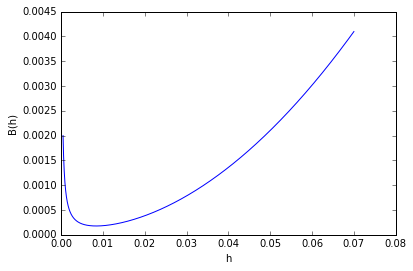

In [63]:
epsilon = 1e-6
M = 5
B = lambda h: epsilon/h + M*h**2 / 6
h = np.linspace(0.0005, 0.07, 10000)

plt.plot(h, B(h))
plt.xlabel("h")
plt.ylabel("B(h)")
plt.show()

$B$ is minimized when $B'(h) = 0$.  
$$
\begin{aligned}
0 = B'(h) &= \frac{2hM}{6} - \frac{\epsilon}{h^2} = \frac{hM}{3} - \frac{\epsilon}{h^2} \\
& \implies \frac{h^3M}{3} = \epsilon \\
& \implies h^3 = \frac{3\epsilon}{M} \\
& \implies h = \left(\frac{3\epsilon}{M}\right)^{1/3} \\
& \implies h = O(\epsilon^{1/3})
\end{aligned}
$$

This corresponds to what we see in the graph, since we get that the above $B(h)$ is minimized at  

$$ h = \left(\frac{3\epsilon}{M}\right)^{1/3} = \left(\frac{3*10^{-6}}{5}\right)^{1/3} \approx 0.008434$$  


It's not a good idea to choose $h$ too small, since, as we can see in the graph, $B(h)$ blows up as $h \downarrow 0$  
We can also see this analytically, since 
$$ \lim_{h \downarrow 0}B(h) = \lim_{h \downarrow 0}\frac{h^2}{6}M + \frac{\epsilon}{h} = 0 + \infty = +\infty $$

## Part II. Lab

a)